In [1]:
import json
import re
import matplotlib.pyplot as plt

In [35]:
genders = [
    'male',
    'female',
    'gender',
    'men',
    'man',
    'woman',
    'women',
    'he',
    'she'
]
male = [
    'male',
    'men',
    'man',
    'he'
]
female = [
    'female',
    'women',
    'woman',
    'she'
]
ages = [
    'child',
    'adolescent',
    'adult',
    'elderly',
    'years old'
]
ethnicities = [
    'Asian',
    'Caucasian',
    'African American',
    'Hispanic',
    'ethnicity'
]
asian = ['Asian']
caucasian = ['Caucasian']
african_american = ['African American']
hispanic = ['Hispanic']
outcomes = [
    'significant',
    'highly',
    #'positive',
    'strong',
    'substantial',
]

In [43]:
class StatsStore:
    def __init__(self, total, keywords, title=None):
        self.total = total
        self.keywords = keywords
        self.counts = 0
        self.title = title

    def percent(self):
        if self.total == 0:
            raise ValueError('No data')
        return self.counts / self.total

    def check_matches(self, text):
        found = False
        for keyword in self.keywords:
            pattern = rf'\b{re.escape(keyword)}\b'
            if re.search(pattern, text, re.IGNORECASE):
                found = True
                break
        if found:
            self.counts += 1

    def get_title(self):
        return self.title


In [65]:
# labeled
data_name = "labeled"
pubmed_data_path = '../data/ori_pqal.json'
# artificial
# data_name = "artificial"
# pubmed_data_path = '../data/ori_pqaa.json'

In [66]:
with open(pubmed_data_path, 'r') as f:
    data = json.load(f)
print('Total data:', len(data))

Total data: 1000


In [67]:
# gender_stats = StatsStore(len(data), genders)
# age_stats = StatsStore(len(data), ages)
# ethn_stats = StatsStore(len(data), ethnicities)
# outcomes_stats = StatsStore(len(data), outcomes)
# male_stats = StatsStore(len(data), male, 'male')
# female_stats = StatsStore(len(data), female, 'female')
asian_stats = StatsStore(len(data), asian, 'Asian')
caucasian_stats = StatsStore(len(data), caucasian, 'Caucasian')
african_american_stats = StatsStore(len(data), african_american, 'African American')
hispanic_stats = StatsStore(len(data), hispanic, 'Hispanic')

#stores = [male_stats, female_stats]
stores = [asian_stats, caucasian_stats, african_american_stats, hispanic_stats]

In [68]:
for i, entry in data.items():
    text = entry['QUESTION']
    text += ' '.join(entry['CONTEXTS'])

    for store in stores:
        store.check_matches(text)

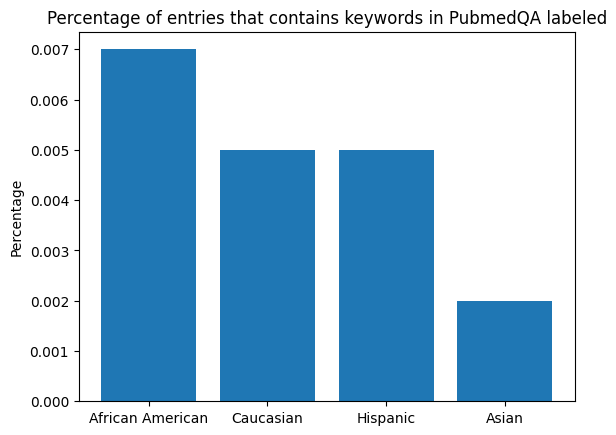

In [69]:
# plot percent bar chart for each store
stats = sorted([s for s in stores], key=lambda x: x.percent(), reverse=True)
percents = [store.percent() for store in stats]
labels = [store.get_title() for store in stats]
plt.bar(labels, percents)
plt.ylabel('Percentage')
plt.title(f'Percentage of entries that contains keywords in PubmedQA {data_name}')
plt.show()